# Submission Final : Recommendation System
____________________________________________________________
____________________________________________________________


# Data Diri
____________________________________________________________
____________________________________________________________

Nama            : **Doli sawaluddin**

E-mail Dicoding : **dholys7@gmail.com**
____________________________________________________________
____________________________________________________________

Dataset:
*   [Indonesia Tourism Destination](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination)

References:


*   [Sistem rekomendasi- Content Based](https://mti.binus.ac.id/2020/11/17/sistem-rekomendasi-content-based/)
*   [Memahami Data Dengan Exploratory Data Analysis](https://medium.com/data-folks-indonesia/memahami-data-dengan-exploratory-data-analysis-a53b230cce84)
*   [Membuat Sistem Rekomendasi dengan Python — Part 1 Teori dan Penjelasan | Machine Learning](https://rizki4106.medium.com/membuat-sistem-rekomendasi-dengan-python-part-1-teori-dan-penjelasan-machine-learning-a567afe5b7f8)









# 1. Import Library yang diperlukan

In [ ]:
import os
import zipfile
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

**Import Library yang diperlukan:**

- **`os`:** Merupakan Sebuah Library yang digunakan untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori.
- **`zipfile`:** Merupakan Sebuah Library yang digunakan  untuk mengolah file zip, seperti mengekstrak atau membuat file zip.
- **`google.colab.files`:** Merupakan Sebuah Library yang digunakan untuk berinteraksi dengan file di Google Colab, seperti mengunggah atau mengunduh file.
- **`pandas`:** adalah Library untuk mengolah data tabular, seperti membaca, menulis, dan memanipulasi DataFrame.
- **`numpy`:** Library ini berguna untuk komputasi numerik, seperti array dan matriks.
- **`matplotlib.pyplot`:** Library ini berfungsi untuk membuat plot dan grafik.
- **`seaborn`:** Library untuk membuat visualisasi data statistik yang lebih baik dan canggih.
- **`Library sklearn`** untuk melakukan pemrosesan machine learning dan data analysis.


* **`tensorflow as tf`:**  Kode ini mengimpor library TensorFlow dan memberikan alias `tf` untuk mempermudah penggunaan.
* **`from tensorflow import keras`:**  Memperkenalkan Keras, API tingkat tinggi yang dibangun di atas TensorFlow. Keras menyediakan antarmuka yang mudah digunakan untuk membangun dan melatih model deep learning.
* **`from tensorflow.keras import layers`:** Mengimpor modul `layers` dari Keras. Modul ini berisi berbagai jenis layer yang digunakan untuk membangun arsitektur neural network, seperti lapisan Dense (fully connected), Convolutional, dan lainnya.
* **`from tensorflow.keras.optimizers import Adam`:** Mengimpor optimiser Adam dari Keras. Optimiser digunakan untuk memperbarui bobot model selama proses pelatihan. Adam merupakan optimiser yang populer karena efektivitas dan efisiensi dalam banyak kasus.
* **`from tensorflow.keras.losses import BinaryCrossentropy`:** Mengimpor fungsi kerugian Binary Crossentropy dari Keras. Fungsi kerugian digunakan untuk mengukur kesalahan model selama pelatihan, dan fungsi ini sangat cocok untuk masalah klasifikasi biner.
* **`from tensorflow.keras.metrics import RootMeanSquaredError`:** Mengimpor metrik Root Mean Squared Error (RMSE) dari Keras. Metrik digunakan untuk mengevaluasi kinerja model selama pelatihan dan pengujian.
* **`from tensorflow.keras.callbacks import EarlyStopping`:** Mengimpor callback `EarlyStopping` dari Keras. Callback ini digunakan untuk menghentikan proses pelatihan model lebih awal jika kinerja model tidak membaik dalam beberapa epoch.



**Catatan:**
- Library-library tersebut digunakan dalam konteks proyek sistem rekomendasi
- Import library dilakukan di awal script untuk memastikan bahwa library-library yang dibutuhkan tersedia sebelum script dijalankan.


# 2. Data Loading

## 2.1. Download Dataset

**Mengunduh dataset dari kaggle**

In [ ]:
files.upload()

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list -s "indonesia-tourism-destination"
!kaggle datasets download -d aprabowo/indonesia-tourism-destination


Saving kaggle.json to kaggle.json
ref                                                   title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
aprabowo/indonesia-tourism-destination                Indonesia Tourism Destination              158KB  2021-07-21 13:02:11          16559        143  0.8235294        
fuarresvij/bali-popular-destination-for-tourist-2022  Bali Popular Destination for Tourist 2022    8KB  2022-11-21 13:45:05           4535         78  1.0              
Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
100% 158k/158k [00:00<00:00, 484kB/s]
100% 158k/158k [00:00<00:00, 484kB/s]


## 2.2. Dataset Preparation

Melakukan Ekstraksi pada file yang telah didownload, dan menampilkan isi dari dataset  kedalam dataframe dengan memanfaatkan *library pandas.*

In [ ]:
local_zip = '/content/indonesia-tourism-destination.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
ratings_df = pd.read_csv('tourism_rating.csv')
user_df = pd.read_csv('user.csv')
tourismid_df = pd.read_csv('tourism_with_id.csv')

In [ ]:
ratings_df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
user_df

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [ ]:
tourismid_df

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


**Mengecek Nilai yang hilang dan nilai kolom yang duplikat**

Jika kita perhatikan kolom unnamed:11 dan unnamed:12 terdapat missing value pada kolom unnamed:11 dan nilai yang sama antara 	Place_Id dengan unnamed:12.

**Nilai yang hilang**

In [ ]:
print(tourismid_df[['Unnamed: 11', 'Unnamed: 12']])
nan_count = tourismid_df['Unnamed: 11'].isnull().sum()
print()
print("Jumlah NaN pada kolom Unnamed: 11:", nan_count)

     Unnamed: 11  Unnamed: 12
0            NaN            1
1            NaN            2
2            NaN            3
3            NaN            4
4            NaN            5
..           ...          ...
432          NaN          433
433          NaN          434
434          NaN          435
435          NaN          436
436          NaN          437

[437 rows x 2 columns]

Jumlah NaN pada kolom Unnamed: 11: 437


**Nilai yang sama**

In [ ]:
print(tourismid_df[['Place_Id', 'Unnamed: 12']])

     Place_Id  Unnamed: 12
0           1            1
1           2            2
2           3            3
3           4            4
4           5            5
..        ...          ...
432       433          433
433       434          434
434       435          435
435       436          436
436       437          437

[437 rows x 2 columns]


Jika kita perhatikan terdapat missing value pada kolom unnamed:11 sebanyak 437 data dan nilai yang sama antara 	Place_Id dengan unnamed:12. Kita dapat mengghapus kedua kolom ini agar data menjadi bersih. Kita juga akan menghapus time_minutes, cordinate, lat, dan long karena data lokasi dan waktu tidak diperlukan untuk tahapan selanjutnya.

Untuk rating kita akan menggunakan rating dari dataframe `ratings_df` agar lebih sesuai dengan preferensi pengguna, sehingga kita akan menghapus data rating pada `tourismid_df` karena untuk sistem rekomendasi ini tidak akan dipakai.

**Menghapus kolom yang tidak diperlukan**

In [ ]:
tourismid_df = tourismid_df.drop(['Unnamed: 11', 'Unnamed: 12','Time_Minutes','Coordinate','Lat','Long','Rating'], axis=1)
tourismid_df

,Place_Id,Place_Name,Description,Category,City,Price
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0


Berdasarkan data diatas untuk membuat sistem rekomendasi , kita hanya akan memanfaatkan dataframe :


*   `user_df` : Berisi informasi tentang user
*   `ratings_df` : Berisi Informasi rating yang diberikan user
*   `tourismid_df` : Berisi informasi lokasi wisata

Alasan kenapa kita tidak menggunakan `dataset package `adalah karena kita belum mengetahui package mana yang pernah diambil oleh user, sehingga kita hanya bisa mencocokkan kesesuaian user dan package hanya berdasarkan kota yang dia kunjungi.




# 3. Data Understanding

## 3.1 Jumlah Data Masing-masing Atribut dari Dataset

Melihat jumlah data atribut penting yang ada pada masing-masing dataframe dengan menggunakan fungsi `.unique().`

In [ ]:
print('Jumlah data Pengguna:', len(user_df.User_Id.unique()))
print('Jumlah data Destinasi Wisata:', len(tourismid_df.Place_Id.unique()))
print('Jumlah Kota', len(tourismid_df.City.unique()))
print('Jumlah user yang memberikan Rating:', len(ratings_df.User_Id.unique()))
print('Jumlah data Rating:', len(ratings_df.User_Id))

Jumlah data Pengguna: 300
Jumlah data Destinasi Wisata: 437
Jumlah Kota 5
Jumlah user yang memberikan Rating: 300
Jumlah data Rating: 10000


Dari data diatas kita mendapatkan 300 pengguna, 437 destinasi wisata dalam 5 kota dengan jumlah rating mencapai 10.000



## 3.2 Univariate Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah bagian dari proses data science. EDA menjadi sangat penting sebelum melakukan feature engineering dan modeling karena dalam tahap ini kita harus memahami datanya terlebih dahulu.Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya [[1]](https://medium.com/data-folks-indonesia/memahami-data-dengan-exploratory-data-analysis-a53b230cce84).

### 3.2.1 Dataset user

Exploratory Data Analysis (EDA) untuk dataframe *user_df*.

In [ ]:
user_df

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


Terdapat 300 pengguna dari berbagai wilayah dan umur yang berbeda.




In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Terdapat 2 variabel bertype int64 dan 1 variabel bertype object yang merupakan alamat user.

In [ ]:
user_df.describe().astype('int')

,User_Id,Age
count,300,300
mean,150,28
std,86,6
min,1,18
25%,75,24
50%,150,29
75%,225,34
max,300,40


Berdasarkan data diatas terdapat 300 pengguna dengan detail sebagai berikut:

*   **count:** Jumlah total data yang dianalisis. Dalam hal ini, ada 300 data untuk kedua variabel, yang berarti ada 300 pengguna dalam dataset ini.
*  **mean:** Rata-rata atau nilai tengah dari semua data. Rata-rata usia pengguna adalah 28 tahun.
*   **std:** Standar deviasi, yang merupakan ukuran sebaran data dari rata-rata. Semakin kecil nilai standar deviasi, semakin dekat data ke nilai rata-rata. Dalam hal ini, standar deviasi usia adalah 6, yang berarti usia pengguna cenderung tersebar dalam rentang 6 tahun di sekitar rata-rata 28 tahun.
*   **min:** Nilai minimum. Usia pengguna termuda adalah 18 tahun.
*  **25%:** Kuartil pertama. Artinya, 25% dari pengguna berusia 24 tahun atau lebih muda.
*  **50%:** Median atau kuartil kedua. Ini adalah nilai tengah dari data yang telah diurutkan. Jadi, 50% pengguna berusia 29 tahun atau lebih muda.
*   **75%:** Kuartil ketiga. Artinya, 75% dari pengguna berusia 34 tahun atau lebih muda
*   **max:** Nilai maksimum. Usia pengguna tertua adalah 40 tahun.


**Menampilkan wisatawan berdasarkan daerah asal**

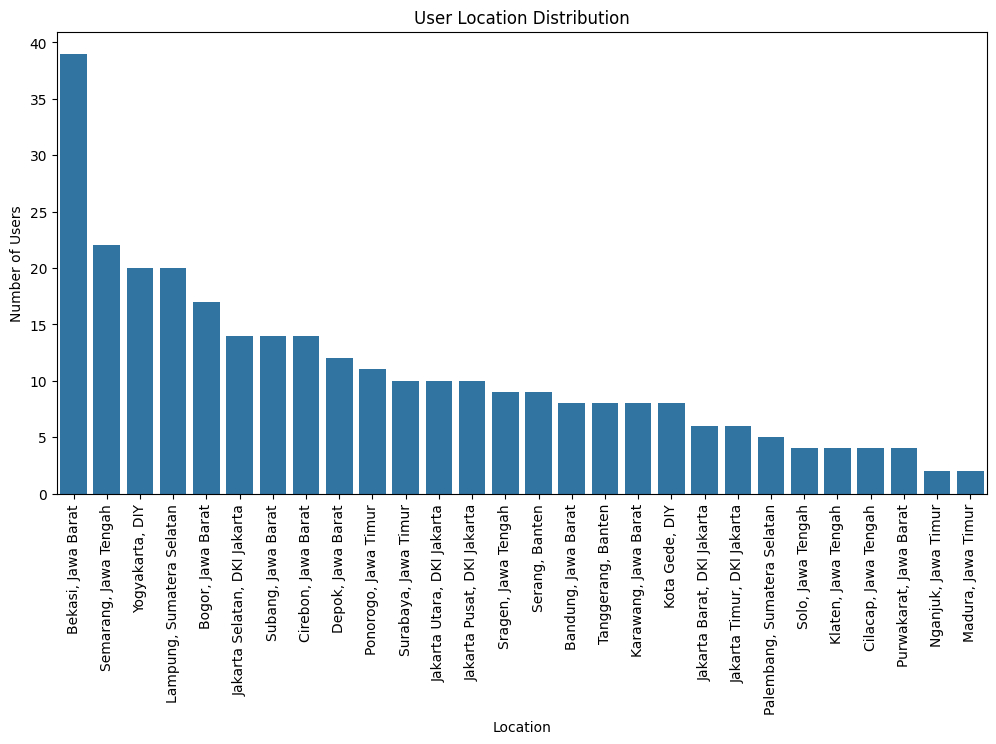

In [ ]:
location_counts = user_df['Location'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=user_df, order=location_counts.index)
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.title('User Location Distribution')
plt.xticks(rotation=90)
plt.show()

Dari data diatas dapat diambil kesimpulan, wisatawan yang memiliki potensi untuk liburan adalah dari daerah Bekasi, Jawa Barat. dan jumlah asal wisatawan dari rentang 10 sampai 22 juga memiliki potensi untuk liburan jika kita bisa merekomendasikan destinasi wisata yang sesuai.

### 3.2.1 Dataset tourism_with_id

Exploratory Data Analysis (EDA) untuk dataframe *tourismid_df*.

In [ ]:
tourismid_df

,Place_Id,Place_Name,Description,Category,City,Price
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0


Berdasarkan data diatas, kita mendapatkan 437 destinasi wisata

**Menampilkan jumlah kategori wisata**

In [ ]:
category_counts = tourismid_df['Category'].value_counts()

print("Category Counts:")
for category, count in category_counts.items():
  print(f"- {category}: {count}")

Category Counts:
- Taman Hiburan: 135
- Budaya: 117
- Cagar Alam: 106
- Bahari: 47
- Tempat Ibadah: 17
- Pusat Perbelanjaan: 15


Berdasarkan jumlah kategori wisata diatas, diketahui wisata paling diminati adalah wisata taman hiburan, budaya dan cagar alam.

In [ ]:
tourismid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place_Id     437 non-null    int64 
 1   Place_Name   437 non-null    object
 2   Description  437 non-null    object
 3   Category     437 non-null    object
 4   City         437 non-null    object
 5   Price        437 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 20.6+ KB


Tedapat 4 variabel bertype object yang merupakan nama wisata, deskripsi wisata, kategori wisata, dan kota wisata. Serta terdapat 2 variabel bertype int64 yang merupakan place_id(id lokasi) dan price/tarif wisata.

In [ ]:
tourismid_df.describe().astype('int')

,Place_Id,Price
count,437,437
mean,219,24652
std,126,66446
min,1,0
25%,110,0
50%,219,5000
75%,328,20000
max,437,900000


Bisa kita lihat biaya atau tarif wisata sangat bervariasi mulai dari 0 rupiah (gratis) sampai 900ribu dalam IDR.

### 3.2.1 Dataset tourism_rating

Exploratory Data Analysis (EDA) untuk dataframe *ratings_df*.

In [ ]:
ratings_df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Terdapat 3 variabel yaitu **user_id** sebagai pengenal pengguna, **place_id** yang merujuk kealamat wisata dan **place_ratings** yang merupakan rating yang diberikan oleh pengguna.


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Semua variabel bertype int64

In [ ]:
ratings_df.describe().astype('int')

,User_Id,Place_Id,Place_Ratings
count,10000,10000,10000
mean,151,219,3
std,86,126,1
min,1,1,1
25%,77,108,2
50%,151,220,3
75%,226,329,4
max,300,437,5


Ratings yang diberikan pengguna mulai dari 1 sampai yang tertinggi di angka 5. serta jumlah pengguna yang memberikan rating berjumlah 300 orang dengan total rating mencapai 10 ribu.

# 4. Data Preprocessing




Data preprocessing adalah teknik transformasi data mentah menjadi format yang lebih terstruktur dan akurat, sehingga dapat meningkatkan kualitas hasil pemodelan.

## 4.1 Menggabungkan data rating dan data lokasi wisata

Walaupun dengan data `ratings_df` dan `tourismid_id` saja sudah cukup untuk membuat sistem rekomendasi namun untuk memudahkan dalam membaca data, kita akan menggabungkan dataframe `ratings_df` dan `tourismid_df` kedalam variabel `data_wisata`.

In [ ]:
data_wisata = pd.merge(ratings_df, tourismid_df, on='Place_Id')
data_wisata

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0


In [ ]:
data_wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        10000 non-null  int64 
 1   Place_Id       10000 non-null  int64 
 2   Place_Ratings  10000 non-null  int64 
 3   Place_Name     10000 non-null  object
 4   Description    10000 non-null  object
 5   Category       10000 non-null  object
 6   City           10000 non-null  object
 7   Price          10000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [ ]:
UserAll = np.sort(np.unique(data_wisata.User_Id.unique()))
PlaceAll = np.sort(np.unique(data_wisata.Place_Id.unique()))
print(f'Jumlah User setelah penggabungan  : {len(UserAll)}')
print(f'Jumlah Place setelah penggabungan : {len(PlaceAll)}')

Jumlah User setelah penggabungan  : 300
Jumlah Place setelah penggabungan : 437


Kita mendapatkan 10 ribu data baru dan tidak ada perubahan pada jumlah user maupun place name, selanjutnya kita akan melakukan pengecekan kembali terhadap data yang sudah digabungkan pada data preparation, untuk memastikan apakah ada missing value atau duplikasi pada data.


# 5. Data Preparation




Tahap data preparation berperan penting dalam memastikan bahwa data yang digunakan untuk membangun model adalah data yang berkualitas, relevan, dan siap digunakan pada proses pengembangan model machine learning.

## 5.1 Mengatasi Missing Value

**Mengecek Missing value pada setiap dataframe**

In [ ]:
tourismid_df.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0


In [ ]:
ratings_df.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


In [ ]:
user_df.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [ ]:
data_wisata.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
Category,0
City,0
Price,0


Berdasarkan data diatas ,ternyata tidak ditemukan adanya missing value pada tiap dataframe


## 5.2 Mengatasi duplikasi data

In [ ]:
print(f'Jumlah data wisata  yang duplikat: {tourismid_df.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings_df.duplicated().sum()}')
print(f'Jumlah data users  yang duplikat: {user_df.duplicated().sum()}')
print(f'Jumlah data Gabungan  yang duplikat: {data_wisata.duplicated().sum()}')

Jumlah data wisata  yang duplikat: 0
Jumlah data rating yang duplikat: 79
Jumlah data users  yang duplikat: 0
Jumlah data Gabungan  yang duplikat: 79


Berdasarkan data di atas, dapat dilihat bahwa terdapat data duplikat pada data rating dan data gabungan. dimana masing-masing memiliki 79 data duplikat.

**Memastikan duplikasi pada dataframe**

**ratings_df**

In [ ]:
duplicate_rows_df1 = ratings_df[ratings_df.duplicated(keep=False)]

sorted_duplicate_rows_df1 = duplicate_rows_df1.sort_values(by=list(ratings_df.columns))

sorted_duplicate_rows_df1


,User_Id,Place_Id,Place_Ratings
25,1,328,2
29,1,328,2
134,5,301,2
144,5,301,2
120,5,321,3
...,...,...,...
9690,291,431,4
9807,295,403,1
9814,295,403,1
9855,296,177,4


**data_wisata**

In [ ]:
duplicate_rows_df2 = data_wisata[data_wisata.duplicated(keep=False)]

sorted_duplicate_rows_df2 = duplicate_rows_df2.sort_values(by=list(data_wisata.columns))

sorted_duplicate_rows_df2


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price
25,1,328,2,Gua Pawon,Gua Pawon adalah sebuah gua alami dan situs pu...,Cagar Alam,Bandung,10000
29,1,328,2,Gua Pawon,Gua Pawon adalah sebuah gua alami dan situs pu...,Cagar Alam,Bandung,10000
134,5,301,2,Lereng Anteng Panoramic Coffee Place,Lereng Anteng Panoramic Coffee adalah sebuah t...,Cagar Alam,Bandung,50000
144,5,301,2,Lereng Anteng Panoramic Coffee Place,Lereng Anteng Panoramic Coffee adalah sebuah t...,Cagar Alam,Bandung,50000
120,5,321,3,Glamping Lakeside Rancabali,Glamping Lakeside Rancabali menawarkan tempat ...,Taman Hiburan,Bandung,30000
...,...,...,...,...,...,...,...,...
9690,291,431,4,Taman Hiburan Rakyat,Taman Hiburan Rakyat atau THR tentunya sudah t...,Taman Hiburan,Surabaya,5000
9807,295,403,1,Taman Barunawati,Taman Barunawati yang lokasinya berada di kota...,Taman Hiburan,Surabaya,0
9814,295,403,1,Taman Barunawati,Taman Barunawati yang lokasinya berada di kota...,Taman Hiburan,Surabaya,0
9855,296,177,4,Pantai Parangtritis,Pantai Parangtritis (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦥꦫꦁꦠꦿ...,Bahari,Yogyakarta,10000


Berdasarkan data diatas kita mendapatkan 79 data berserta duplikasinya sebanyak 79 data sehingga data yg ditampilkan mencapai 158 baris, dimana bisa kita lihat terdapat beberapa baris yang menampilkan data yang sama. Selanjutnya kita bisa menghapus data duplikat ini.

**Menghapus duplikasi dan Mengecek kembali jumlah duplikat setelah penghapusan**

In [ ]:
ratings_df = ratings_df.drop_duplicates()
duplicate_rows_df = ratings_df[ratings_df.duplicated(keep=False)]
print("Jumlah duplikat Rating setelah penghapusan:", len(duplicate_rows_df))

data_wisata = data_wisata.drop_duplicates()
duplicate_rows_df = data_wisata[data_wisata.duplicated(keep=False)]
print("Jumlah duplikat Gabungan setelah penghapusan:", len(duplicate_rows_df))


Jumlah duplikat Rating setelah penghapusan: 0
Jumlah duplikat Gabungan setelah penghapusan: 0


In [ ]:
ratings_df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
data_wisata

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0


Sekarang data sudah bersih dengan jumlah akhir sebanyak 9921 baris dengan 10 kolom

# 6. Model Development dengan Content Based Filtering

Content-based filtering Memberikan rekomendasi berdasarkan kemiripan atribut dari item atau barang yang disukai oleh pengguna. [[2]](https://mti.binus.ac.id/2020/11/17/sistem-rekomendasi-content-based/)

Dengan sistem rekomendasi berbasis konten, pengguna akan mendapatkan saran yang lebih personal dan sesuai dengan minat mereka.

## 6.1 TF-IDF Vectorizer

TF-IDF digunakan untuk mengubah teks menjadi vektor numerik yang merepresentasikan pentingnya setiap kata dalam dokumen.

In [ ]:
tf = TfidfVectorizer(ngram_range=(1, 2))

tf.fit(tourismid_df['Category'])

tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'cagar alam', 'hiburan',
       'ibadah', 'perbelanjaan', 'pusat', 'pusat perbelanjaan', 'taman',
       'taman hiburan', 'tempat', 'tempat ibadah'], dtype=object)

In [ ]:
tfidf_matrix = tf.fit_transform(tourismid_df['Category'])
tfidf_matrix.shape

(437, 14)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57735027, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.57735027, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57735027, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.57735027,
         0.57735027]])

**matriks tf-idf untuk beberapa nama wisata (place_name) dan kategori wisata  (Category).**

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=tourismid_df.Place_Name
).sample(6, axis=1).sample(10, axis=0)

,tempat,cagar,budaya,bahari,taman,perbelanjaan
Place_Name,,,,,,
Kauman Pakualaman Yogyakarta,0.0,0.00000,1.0,0.0,0.00000,0.0
Kampung Wisata Sosro Menduran,0.0,0.00000,1.0,0.0,0.00000,0.0
Curug Cimahi,0.0,0.57735,0.0,0.0,0.00000,0.0
Pantai Kesirat,0.0,0.00000,0.0,1.0,0.00000,0.0
House of Sampoerna,0.0,0.00000,1.0,0.0,0.00000,0.0
Wisata Kampung Krisan Clapar,0.0,0.00000,0.0,0.0,0.57735,0.0
Pantai Baruna,0.0,0.00000,0.0,1.0,0.00000,0.0
Taman Pelangi Yogyakarta,0.0,0.00000,0.0,0.0,0.57735,0.0
Taman Sejarah Bandung,0.0,0.00000,1.0,0.0,0.00000,0.0


Dari data diatas bisa kita lihat hubungan nama wisata dengan kategori wisata. 0 artinya tidak memiliki hubungan sedangkan angka yang mendekati 1 maka dapat dipastikan kedua fitur memiliki relasi.



## 6.2 Cosine Similarity

Cosine similarity adalah metrik yang digunakan untuk mengukur kesamaan antara dua vektor. Dalam konteks pemrosesan bahasa alami, vektor ini seringkali merepresentasikan dokumen atau teks.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=tourismid_df['Place_Name'], columns=tourismid_df['Place_Name'])
print('Shape:', cosine_sim_df.shape)


cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


Place_Name,Caringin Tilu,Plaza Indonesia,Keraton Surabaya,Taman Badak,Saung Angklung Mang Udjo
Place_Name,,,,,
Kampung Korea Bandung,0.0,0.0,1.0,0.0,1.0
Taman Hutan Raya Ir. H. Juanda,1.0,0.0,0.0,0.0,0.0
Curug Dago,1.0,0.0,0.0,0.0,0.0
Pantai Baruna,0.0,0.0,0.0,0.0,0.0
Kota Tua,0.0,0.0,1.0,0.0,1.0
Pasar Seni,0.0,1.0,0.0,0.0,0.0
NuArt Sculpture Park,0.0,0.0,0.0,1.0,0.0
Goa Rong,1.0,0.0,0.0,0.0,0.0
Old City 3D Trick Art Museum,0.0,0.0,1.0,0.0,1.0


Dengan consine similarity kita berhasil mengidentifikasi kesamaan antara satu  lokasi wisata dengan lokasi wisata lainnya.

## 6.3 Mendapatkan Rekomendasi

In [ ]:
def Rekomendasi_wisata_1(Place_Name, similarity_data=cosine_sim_df, items=tourismid_df[['Place_Name', 'Category', 'City','Price']], k=5):

    index = similarity_data.loc[:,Place_Name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(Place_Name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
tourismid_df[tourismid_df.Place_Name.eq('Pantai Patihan')]

,Place_Id,Place_Name,Description,Category,City,Price
151,152,Pantai Patihan,"Pantai ini terletak di daerah Srigading, Sande...",Bahari,Yogyakarta,5000


Berdasarkan data diatas maka kita akan mencoba merekomendasikan wisata bahari kepada wisatawan. Selanjutnya kita akan mengecek berapa jumlah destinasi wisata pada kategory bahari.

In [ ]:
print("Jumlah kategori bahari:", tourismid_df[tourismid_df['Category'] == 'Bahari']['Category'].count())

Jumlah kategori bahari: 47


Berdasarkan data diatas kita akan set Top-n atau K menjadi 47 ,sehingga kita bisa melihat seberapa banyak model dapat memberikan rekomendasi yang sesuai.

In [ ]:
Rekomendasi_wisata_1('Pantai Patihan',k=47).drop_duplicates()

,Place_Name,Category,City,Price
0,Pantai Pok Tunggal,Bahari,Yogyakarta,10000
1,Pantai Parangtritis,Bahari,Yogyakarta,10000
2,Pulau Semak Daun,Bahari,Jakarta,40000
3,Pantai Nglambor,Bahari,Yogyakarta,10000
4,Pantai Indrayanti,Bahari,Yogyakarta,10000
5,Pantai Depok Jogja,Bahari,Yogyakarta,10000
6,Pantai Sundak,Bahari,Yogyakarta,5000
7,Hutan Mangrove Kulon Progo,Bahari,Yogyakarta,5000
8,Pantai Sepanjang,Bahari,Yogyakarta,10000
9,Pantai Krakal,Bahari,Yogyakarta,10000


Berdasarkan data diatas, model berhasil memberikan 46 rekomendasi yang sesuai, namun terdapat 1 rekomendasi yang tidak sesuai yaitu Wisata Alam Kalibiru yang merupakan kategori Cagar alam.

## 6.4 Metrik Evaluasi

In [ ]:
benar = 46
rekomendasi = 47

precision = benar / rekomendasi

print("Precision:", precision)

Precision: 0.9787234042553191


# 7. Model Development dengan Collaborative Filtering

Sistem rekomendasi penyaringan kolaboratif menggunakan informasi tentang preferensi pengguna di masa lalu, seperti rating yang diberikan pada produk atau konten tertentu, untuk memprediksi item mana yang paling mungkin disukai oleh pengguna di masa depan.

## 7.1 Data Preparation

Melakukan penyandian (*encoding*) fitur `User_Id` ke dalam indeks integer.

In [ ]:
user_ids = data_wisata.User_Id.unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

print(user_ids)
print(user_to_user_encoded)
print(user_encoded_to_user)

[152, 69, 169, 1, 201, 146, 276, 164, 204, 89, 139, 271, 49, 16, 207, 71, 141, 214, 112, 77, 102, 134, 225, 28, 153, 210, 130, 268, 246, 168, 138, 182, 299, 62, 42, 245, 243, 108, 148, 231, 166, 212, 51, 151, 10, 25, 170, 120, 247, 17, 19, 186, 59, 173, 67, 136, 188, 197, 11, 180, 239, 150, 113, 8, 124, 179, 219, 3, 116, 122, 228, 66, 295, 31, 72, 250, 217, 274, 230, 205, 200, 156, 87, 157, 300, 256, 14, 234, 264, 92, 123, 26, 185, 20, 140, 163, 248, 52, 75, 251, 128, 117, 2, 29, 105, 191, 242, 100, 193, 101, 78, 233, 288, 38, 257, 177, 131, 32, 194, 106, 114, 213, 93, 206, 154, 165, 86, 216, 97, 267, 211, 56, 249, 46, 7, 43, 68, 184, 73, 238, 252, 161, 176, 21, 159, 36, 99, 167, 286, 147, 137, 222, 298, 240, 64, 145, 232, 175, 94, 178, 266, 296, 80, 127, 237, 192, 253, 259, 279, 183, 88, 143, 81, 160, 277, 281, 44, 40, 223, 125, 142, 270, 269, 82, 293, 35, 290, 103, 34, 76, 126, 272, 83, 289, 144, 119, 129, 33, 287, 282, 39, 215, 135, 226, 174, 155, 283, 132, 6, 9, 95, 202, 63, 195, 2

Melakukan penyandian *(encoding)* fitur `Place_Id` ke dalam indeks integer.

In [ ]:
Place_Ids = data_wisata.Place_Id.unique().tolist()
Place_to_Place_encoded = {x: i for i, x in enumerate(Place_Ids)}
Place_encoded_to_Place = {i: x for i, x in enumerate(Place_Ids)}


print(Place_Ids)
print(Place_to_Place_encoded)
print(Place_encoded_to_Place)

[332, 258, 206, 373, 314, 325, 397, 264, 223, 408, 114, 8, 345, 266, 26, 29, 196, 160, 221, 430, 390, 198, 71, 163, 271, 234, 63, 88, 220, 356, 112, 288, 341, 249, 102, 413, 239, 139, 137, 385, 168, 192, 12, 392, 155, 379, 434, 279, 165, 382, 79, 378, 66, 199, 294, 99, 6, 317, 74, 244, 320, 228, 290, 342, 330, 381, 31, 118, 366, 433, 292, 67, 403, 322, 34, 7, 241, 268, 78, 260, 315, 405, 45, 307, 368, 193, 62, 312, 59, 227, 284, 14, 250, 428, 4, 18, 389, 41, 218, 136, 352, 54, 131, 353, 334, 346, 214, 384, 230, 261, 224, 344, 255, 425, 361, 252, 159, 289, 253, 293, 402, 431, 295, 337, 185, 47, 35, 56, 421, 226, 427, 105, 27, 145, 321, 299, 372, 103, 188, 156, 107, 363, 30, 173, 96, 65, 420, 90, 238, 176, 324, 182, 311, 233, 380, 55, 217, 119, 53, 357, 240, 274, 100, 2, 108, 171, 351, 243, 302, 201, 180, 149, 285, 298, 423, 46, 124, 309, 122, 281, 16, 335, 273, 195, 303, 300, 89, 42, 179, 387, 104, 167, 177, 13, 328, 376, 369, 406, 211, 158, 355, 257, 296, 142, 396, 437, 44, 128, 101, 3

Memetakan `User_Id` dan `Place_Id` ke dalam masing-masing *dataframe* yang berkaitan.

In [ ]:
data_wisata['User_en'] = data_wisata.User_Id.map(user_to_user_encoded)
data_wisata['Place_en'] = data_wisata.Place_Id.map(Place_to_Place_encoded)

Melakukan pengecekan jumlah user, jumlah wisata, dan rating minimal serta rating maksimal.

In [ ]:
Num_Users = len(user_encoded_to_user)
Num_Place = len(Place_encoded_to_Place)
print(Num_Users)
print(Num_Place)

Rating_min = min(data_wisata.Place_Ratings)
Rating_max = max(data_wisata.Place_Ratings)
print(f'Number of User: {Num_Users}, Number of Place: {Num_Place}, Min Rating: {Rating_min}, Max Rating: {Rating_max}')

300
437
Number of User: 300, Number of Place: 437, Min Rating: 1, Max Rating: 5


## 7.2 Training Data and Validation Data Split

Setelah melakukan pemetaan atribut 'User_en' dan 'Place_en' pada dataframe 'data_wisata', data tersebut akan diacak secara random. Tujuannya adalah untuk memastikan bahwa data yang digunakan dalam analisis selanjutnya tidak memiliki bias akibat urutan data aslinya.

In [ ]:
data_wisata = data_wisata.sample(frac=1, random_state=412)
data_wisata

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,User_en,Place_en
8484,256,258,2,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,85,1
8311,250,225,2,Orchid Forest Cikole,Orchid Forest Cikole Lembang sudah berdiri sej...,Taman Hiburan,Bandung,50000,75,365
8129,244,296,2,Batununggal Indah Club,Kolam renang Batununggal merupakan salah satu ...,Taman Hiburan,Bandung,70000,246,202
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,3,3
494,17,410,4,Ciputra Waterpark,Ciputra Waterpark Surabaya – Bermain air di wa...,Taman Hiburan,Surabaya,95000,49,259
...,...,...,...,...,...,...,...,...,...,...
3547,108,50,2,Museum Joang 45,Gedung Joang '45 atau Museum Joang 45 adalah s...,Budaya,Jakarta,2000,37,399
6766,203,127,2,Blue Lagoon Jogja,Blue Lagoon adalah salah satu wisata air Jogja...,Taman Hiburan,Yogyakarta,10000,229,213
9933,298,254,5,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,152,397
8417,254,306,2,Sungai Palayangan,Sungai Palayangan terletak di Kawasan Objek Wi...,Cagar Alam,Bandung,150000,249,220


Untuk membangun dan mengevaluasi model yang baik, dataset akan dibagi menjadi data latih (80%) dan data uji (20%). Data latih digunakan untuk mengajarkan model mengenali pola dalam data, sementara data uji digunakan untuk mengukur seberapa baik model tersebut dapat memprediksi data yang belum pernah dilihat sebelumnya.

In [ ]:
x = data_wisata[['User_en', 'Place_en']].values
y = data_wisata['Place_Ratings'].apply(lambda x: (x-Rating_min) / (Rating_max-Rating_min)).values

train_indices = int(0.8 * data_wisata.shape[0])

xTrain, xVal, yTrain, yVal = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 85   1]
 [ 75 365]
 [246 202]
 ...
 [152 397]
 [249 220]
 [208  27]] [0.25 0.25 0.25 ... 1.   0.25 1.  ]


## 7.3 Model Development and Training

Untuk membangun model rekomendasi, kita akan memanfaatkan kemampuan deep learning melalui kelas `RecommenderNet` yang disediakan oleh Keras.

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, Num_Users, Num_Place, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.Num_Users = Num_Users
        self.Num_Place = Num_Place
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            Num_Users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias      = layers.Embedding(Num_Users, 1)

        self.Place_embedding = layers.Embedding(
            Num_Place,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.Place_bias = layers.Embedding(Num_Place, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0])
        user_bias   = self.user_bias(inputs[:, 0])
        Place_vector = self.Place_embedding(inputs[:, 1])
        Place_bias   = self.Place_bias(inputs[:, 1])

        dot_user_Place = tf.tensordot(user_vector, Place_vector, 2)

        x = dot_user_Place + user_bias + Place_bias

        return tf.nn.sigmoid(x)

Untuk melatih model, kita akan menggunakan optimizer Adam yang efisien. Fungsi kehilangan binary crossentropy akan membantu model belajar meminimalkan kesalahan prediksi, sementara metrik RMSE akan digunakan untuk mengukur seberapa akurat model dalam membuat prediksi numerik.

In [ ]:
model = RecommenderNet(Num_Users, Num_Place, 30)

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss      = BinaryCrossentropy(),
    metrics   = [RootMeanSquaredError()]
)

Langkah berikutnya, memulai proses training.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x               = xTrain,
    y               = yTrain,
    batch_size      = 64,
    epochs          = 100,
    validation_data = (xVal, yVal),
    callbacks=[early_stopping],
)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6894 - root_mean_squared_error: 0.3415 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3456
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6892 - root_mean_squared_error: 0.3439 - val_loss: 0.6962 - val_root_mean_squared_error: 0.3461
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6866 - root_mean_squared_error: 0.3397 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3464
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6861 - root_mean_squared_error: 0.3420 - val_loss: 0.6970 - val_root_mean_squared_error: 0.3466
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6863 - root_mean_squared_error: 0.3412 - val_loss: 0.6968 - val_root_mean_squared_error: 0.3465
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6915 - root_mean_squared_error: 0.3446 - val_loss: 0.6987 - val_root_mean_squared_error: 0.3478
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

**Visualisasi Metrik**

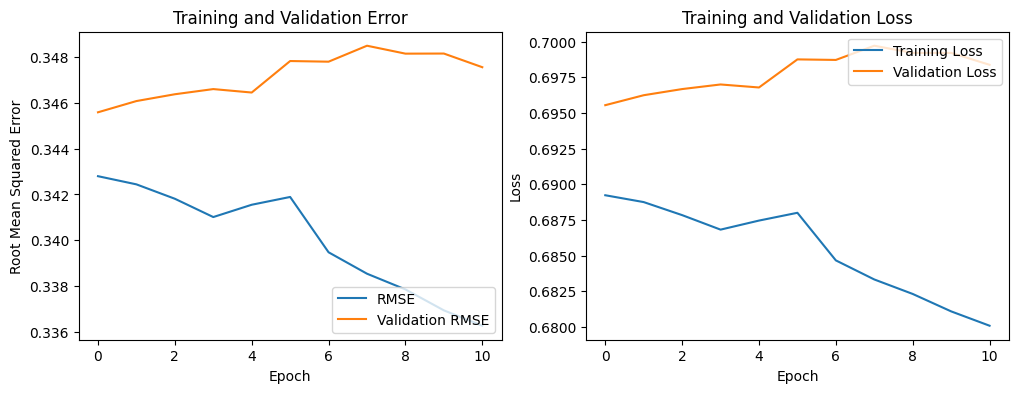

In [ ]:
rmse     = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(rmse,     label='RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Training and Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(loss,     label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Dari hasil plot, terlihat bahwa model mengalami overfitting. Hal ini ditandai dengan penurunan nilai loss pada data training, sedangkan nilai loss pada data validasi cenderung meningkat. Grafik RMSE menunjukkan hal yang sama, dimana RMSE pada data training terus menurun, sedangkan RMSE pada data validasi cenderung stagnan atau bahkan meningkat. Dengan demikian model perlu dikembangkan lagi kedepannya. Namun dengan nilai RMSE 0,3 seharusnya sudah bisa memprediksi dengan baik. Selanjutnya kita akan menguji apakah model bisa memprediksi dengan baik atau tidak.

## 7.4 Mendapatkan Rekomendasi Wisata

Untuk mendapatkan rekomendasi wisata yang akan dihasilkan oleh sistem, diperlukan sebuah data atau sampel dari pengguna secara acak dan mendefinisikan variabel Place_Name yang belum pernah dibaca oleh pengguna (notVisitedPlace) yang merupakan daftar wisata yang nantinya akan direkomendasikan. Daftar tersebut dapat didapatkan dengan menggunakan operator logika bitwise (~) pada variabel Place_Name yang telah dikunjungi oleh pengguna (VisitedPlace).

In [ ]:
userId      = data_wisata.User_Id.sample(1).iloc[0]
VisitedPlace = data_wisata[data_wisata.User_Id == userId]

notVisitedPlace = data_wisata[~data_wisata['Place_Id'].isin(VisitedPlace.Place_Id.values)]['Place_Id']
notVisitedPlace = list(
    set(notVisitedPlace).intersection(set(Place_to_Place_encoded.keys()))
)

notVisitedPlace = [[Place_to_Place_encoded.get(x)] for x in notVisitedPlace]
userEncoder    = user_to_user_encoded.get(userId)
userPlaceArray = np.hstack(
    ([[userEncoder]] * len(notVisitedPlace), notVisitedPlace)
)

Untuk mendapatkan rekomendasi daftar wisata, kita akan memanfaatkan fungsi `predict()` dari library Keras.

In [ ]:
ratings = model.predict(userPlaceArray).flatten()

topRatingsIndices   = ratings.argsort()[-10:][::-1]
recommendedPlaceIds = [
    Place_encoded_to_Place.get(notVisitedPlace[x][0]) for x in topRatingsIndices
]

print('Showing recommendations for users: {}'.format(userId))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

topPlaceUser = (
    VisitedPlace.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

PlaceDfRows = tourismid_df[tourismid_df['Place_Id'].isin(topPlaceUser)]
for row in PlaceDfRows.itertuples():
    print(row.Place_Name, ':', row.Category)

print('=====' * 8)
print('Top 10 Place Recommendation')
print('-----' * 8)

recommended_place = tourismid_df[tourismid_df['Place_Id'].isin(recommendedPlaceIds)]
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.Category)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Showing recommendations for users: 230
Place with high ratings from user
----------------------------------------
Pantai Nglambor : Bahari
Desa Wisata Pulesari : Taman Hiburan
Trans Studio Bandung : Taman Hiburan
Sunrise Point Cukul : Cagar Alam
Monumen Kapal Selam : Budaya
Top 10 Place Recommendation
----------------------------------------
Monumen Nasional : Budaya
Wisata Agro Edukatif Istana Susu Cibugary : Taman Hiburan
Puncak Gunung Api Purba - Nglanggeran : Cagar Alam
Bunker Kaliadem Merapi : Cagar Alam
Seribu Batu Songgo Langit : Cagar Alam
Pantai Baron : Bahari
Pintoe Langit Dahromo : Cagar Alam
Pantai Indrayanti : Bahari
Museum Gunung Merapi : Budaya
Masjid Agung Trans Studio Bandung : Tempat Ibadah
